In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
dataset=pd.get_dummies(dataset,drop_first=True)

In [5]:
dataset

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,1,19,15,39,True
1,2,21,15,81,True
2,3,20,16,6,False
3,4,23,16,77,False
4,5,31,17,40,False
...,...,...,...,...,...
195,196,35,120,79,False
196,197,45,126,28,False
197,198,32,126,74,True
198,199,32,137,18,True


In [6]:
dataset=dataset.astype(int)

In [7]:
dataset

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,0
196,197,45,126,28,0
197,198,32,126,74,1
198,199,32,137,18,1


In [8]:
X = dataset.iloc[:, [3, 4]].values

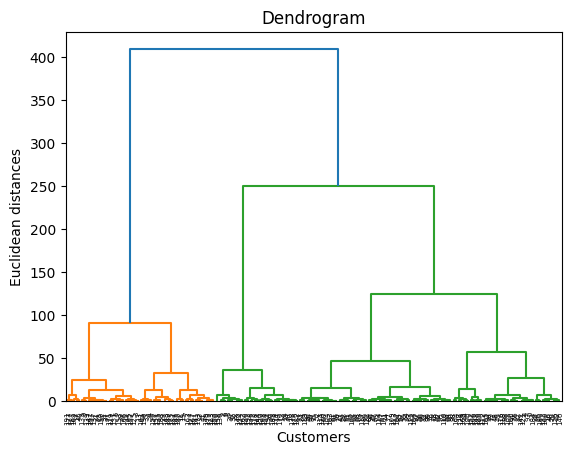

In [9]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [10]:
from sklearn.cluster import AgglomerativeClustering

In [12]:
clusmodel = AgglomerativeClustering(n_clusters = 5)
label = clusmodel.fit_predict(X)

In [13]:
supervised=pd.DataFrame(dataset)

In [14]:
supervised

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,0
196,197,45,126,28,0
197,198,32,126,74,1
198,199,32,137,18,1


In [15]:
supervised['Cluster_group']=label

In [16]:
supervised

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,Cluster_group
0,1,19,15,39,1,0
1,2,21,15,81,1,3
2,3,20,16,6,0,2
3,4,23,16,77,0,4
4,5,31,17,40,0,0
...,...,...,...,...,...,...
195,196,35,120,79,0,4
196,197,45,126,28,0,0
197,198,32,126,74,1,4
198,199,32,137,18,1,2


C:\Users\sreet\anaconda3\envs\aidl\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


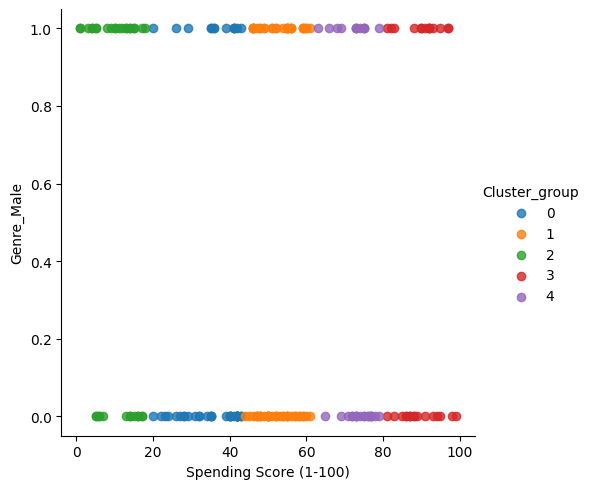

In [17]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5], 
                   fit_reg=False, legend=True, legend_out=True)

C:\Users\sreet\anaconda3\envs\aidl\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


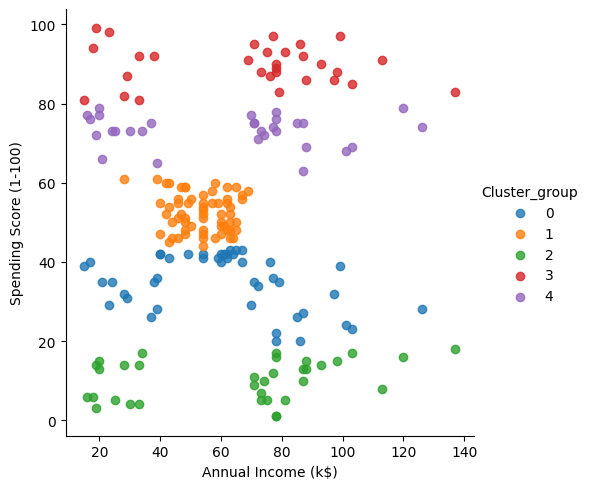

In [19]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[2], y=supervised.columns[3], hue=supervised.columns[5],
                   fit_reg=False,legend_out=True)

C:\Users\sreet\anaconda3\envs\aidl\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


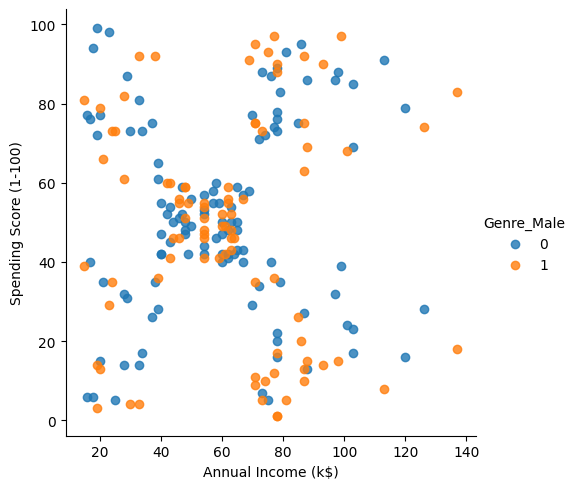

In [23]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[2], y=supervised.columns[3], hue=supervised.columns[4],
                   fit_reg=False,legend_out=True)